# Tutorial: How to Create Your Own Backtesting Framework for Trading

Steps:
1. Import the necessary modules
2. Set the contant variables
3. Retrieve the OHLCV data of the ticker symbol from pandas-datareader
4. Create a 'Returns' column by getting the percentage change of the closing prices
5. Plot the chart showing the Returns
6. Setup the Technical Indicator Columns
7. Create a function that will check for Entry and Exit conditions
8. Create the Signal column then apply the function for the Entry and Exit signals
9. Create Signal Returns Column
10. Plot both the Buy n Hold Returns & Signal Returns in the chart
11. Create Balance Column
12. Create Signal Balance Column
13. Plot Buy N Hold, Signal Balance Columns in Chart

## Step 1: Import the modules

In [2]:
import threading
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

## Step 2: Set the contant variables

Set the Start & End date

In [3]:
START_DATE = '2015-1-1'
END_DATE = '2021-1-1'

Set the ticker symbol

In [5]:
TICKER = 'SPY'

Set your desired balance of account

In [4]:
BALANCE = 10000

Set the initial number of trades

In [79]:
TRADE_COUNT = 0

## Step 3: Retrive the OHLCV data of the ticker symbol from pandas-datareader

In [6]:
df = pdr.DataReader(TICKER, 'yahoo', start=START_DATE, end=END_DATE)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,208.190002,205.389999,207.990005,205.539993,130333800.0,181.653259
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,181.556000
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,178.277176
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,176.598022
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,178.798615


## Step 4: Create a 'Returns' column by getting the percentage change of the closing prices

In [7]:
df['Returns'] = df['Close'].pct_change().fillna(0)
df['Returns']

Date
2014-12-31    0.000000
2015-01-02   -0.000535
2015-01-05   -0.018060
2015-01-06   -0.009419
2015-01-07    0.012461
                ...   
2020-12-24    0.003890
2020-12-28    0.008591
2020-12-29   -0.001908
2020-12-30    0.001427
2020-12-31    0.005081
Name: Returns, Length: 1512, dtype: float64

## Step 5 - Plot the chart showing the Returns

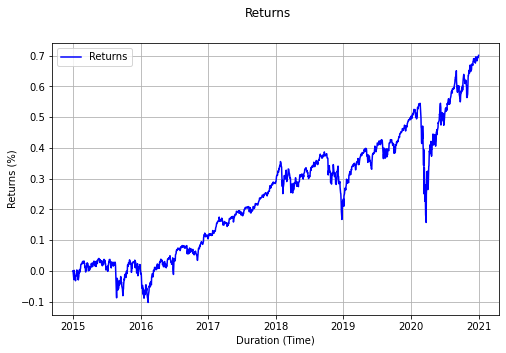

In [69]:
fig1 = plt.figure()
fig1.set_size_inches(8,5)
fig1.suptitle('Returns')
plt.plot(df['Returns'].cumsum(),color='blue',label='Returns')
plt.grid(True,which='both')
plt.legend()
plt.ylabel('Returns (%)')
plt.xlabel('Duration (Time)')
plt.show()

## Step 6 - Setup the Technical Indicator Columns

Moving Average 20-bar

In [9]:
df['ma20'] = df['Close'].rolling(20).mean().dropna()
df['ma20']

Date
2014-12-31           NaN
2015-01-02           NaN
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
                 ...    
2020-12-24    367.586501
2020-12-28    368.011501
2020-12-29    368.481500
2020-12-30    368.780000
2020-12-31    369.134500
Name: ma20, Length: 1512, dtype: float64

Moving Average 50-bar

In [78]:
df['ma50'] = df['Close'].rolling(50).mean().dropna()
df['ma50']

Date
2014-12-31           NaN
2015-01-02           NaN
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
                 ...    
2020-12-24    355.769802
2020-12-28    356.263202
2020-12-29    356.746602
2020-12-30    357.346201
2020-12-31    357.956201
Name: ma50, Length: 1512, dtype: float64

## Step 7 - Create a function that will check for Entry and Exit conditions

In [24]:
def new_column(row):
    if row['Close'] > row['ma20']:
        if(row['ma20'] > row['ma50']):
            return 1
        else:
            return 0
    else:
        return 0

## Step 8 - Create the Signal column then apply the function for the Entry and Exit signals
* 0 - no position
* 1 - long position
* -1 - short position

In [25]:
df['Signal'] = df.apply(new_column, axis=1)
df['Signal']

Date
2014-12-31    0
2015-01-02    0
2015-01-05    0
2015-01-06    0
2015-01-07    0
             ..
2020-12-24    1
2020-12-28    1
2020-12-29    1
2020-12-30    1
2020-12-31    1
Name: Signal, Length: 1512, dtype: int64

## Step 9 - Create Signal Returns Column
(get the Returns value if signal is long, set value as 0 if signal is none)

In [60]:
df['Signal Returns'] = np.where(df['Signal'] == 1,  df['Returns'], 0)
df['Signal Returns']

Date
2014-12-31    0.000000
2015-01-02    0.000000
2015-01-05    0.000000
2015-01-06    0.000000
2015-01-07    0.000000
                ...   
2020-12-24    0.003890
2020-12-28    0.008591
2020-12-29   -0.001908
2020-12-30    0.001427
2020-12-31    0.005081
Name: Signal Returns, Length: 1512, dtype: float64

## Step 10 - Plot both the Buy n Hold Returns & Signal Returns in the chart

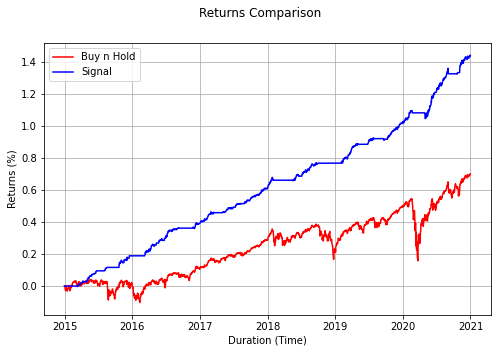

In [70]:
fig2 = plt.figure()
fig2.set_size_inches(8,5)
fig2.suptitle('Returns Comparison')
plt.plot(df['Returns'].cumsum(),color='red',label='Buy n Hold')
plt.plot(df['Signal Returns'].cumsum(),color='blue',label='Signal')
plt.grid(True,which='both')
plt.legend()
plt.ylabel('Returns (%)')
plt.xlabel('Duration (Time)')
plt.show()

## Step 11 - Create Balance Column

In [102]:
df['r_cumsum'] = df['Returns'].cumsum()
df['Balance'] = (BALANCE * df['r_cumsum']) + BALANCE
df['Balance']

Date
2014-12-31    10000.000000
2015-01-02     9994.648214
2015-01-05     9814.051826
2015-01-06     9719.862163
2015-01-07     9844.473821
                  ...     
2020-12-24    16875.313424
2020-12-28    16961.221647
2020-12-29    16942.143754
2020-12-30    16956.411745
2020-12-31    17007.219958
Name: Balance, Length: 1512, dtype: float64

## Step 12 - Create Signal Balance Column

In [72]:
df['sr_cumsum'] = df['Signal Returns'].cumsum()
df['Signal Balance'] = (BALANCE * df['sr_cumsum']) + BALANCE
df['Signal Balance']

Date
2014-12-31    10000.000000
2015-01-02    10000.000000
2015-01-05    10000.000000
2015-01-06    10000.000000
2015-01-07    10000.000000
                  ...     
2020-12-24    24270.213996
2020-12-28    24356.122219
2020-12-29    24337.044326
2020-12-30    24351.312317
2020-12-31    24402.120530
Name: Signal Balance, Length: 1512, dtype: float64

## Step 13 - Plot Buy N Hold, Signal Balance Columns in Chart

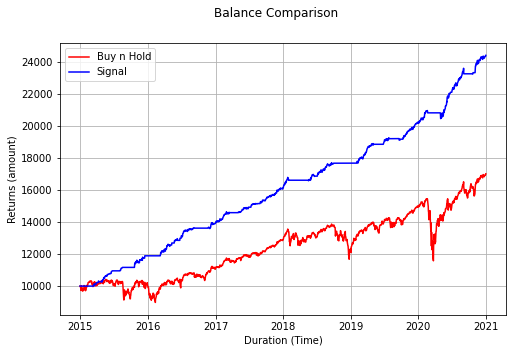

In [103]:
fig3 = plt.figure()
fig3.set_size_inches(8,5)
fig3.suptitle('Balance Comparison')
plt.plot(df['Balance'],color='red',label='Buy n Hold')
plt.plot(df['Signal Balance'],color='blue',label='Signal')
plt.grid(True,which='both')
plt.legend()
plt.ylabel('Returns (amount)')
plt.xlabel('Duration (Time)')
plt.show()